### MNIST Handwritten Digit Recognision

**Importing Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load MNIST dataset

from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
# after loading mnist data , divide into train and test datasets

(X_train , y_train) , (X_test , y_test) = mnist.load_data()

In [4]:
# Check what is shape of data

print(X_train.shape , X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


- Training data : 60,000 Images
- Test data :  10,000 Images
    
- Image Dimension : 28 x 28
- Grayscale Image : 1 channel

In [5]:
# Printing the 10th images

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

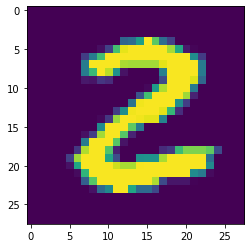

2


In [6]:
# Displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label

print(y_train[25])

In [7]:
# Unique values in y_train
print(np.unique(y_train))

# Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


- We can use these labels as such or we can also apply One Hot Encoding
- All the images have the same dimensions in the dataset, if not, we have to resize all the images to common dimension.

In [8]:
# Scaling the values

X_train = X_train / 255
X_test = X_test / 255

In [9]:
# Printing the 10th images

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Resizing image to make it suitable for apply Convolutional Operation**

In [10]:
img_size = 28

X_train_resize = np.array(X_train).reshape(-1, img_size, img_size, 1)  #[index no. of img, img_size, img_size, channel]
X_test_resize = np.array(X_test).reshape(-1, img_size, img_size, 1)

print(X_train_resize.shape)
print(X_test_resize.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


**Building the Neural Network**

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D

In [12]:
# Creating a Convolutional Neural Netework

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(64, (3,3), input_shape = X_train_resize.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Third Convolutional Layer - 1
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

# Fully Connected Layer - 2
model.add(Dense(32))
model.add(Activation('relu'))

# Last Fully Connected Layer output must be equal to no. of classes, 10(0-9)
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [14]:
print("Total Training samples = " , len(X_train_resize))

Total Training samples =  60000


In [15]:
# Compile the Neural Network

model.compile(loss="sparse_categorical_crossentropy" , optimizer = "adam" , metrics=['accuracy'])

In [16]:
# Training the Neural Network

model.fit(X_train_resize, y_train , epochs=10, validation_split= 0.3)

Epoch 1/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.2713 - accuracy: 0.9156 - val_loss: 0.1308 - val_accuracy: 0.9593
Epoch 2/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0910 - accuracy: 0.9716 - val_loss: 0.0877 - val_accuracy: 0.9727
Epoch 3/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0631 - accuracy: 0.9794 - val_loss: 0.0707 - val_accuracy: 0.9783
Epoch 4/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0510 - accuracy: 0.9844 - val_loss: 0.0617 - val_accuracy: 0.9819
Epoch 5/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0434 - accuracy: 0.9860 - val_loss: 0.0605 - val_accuracy: 0.9816
Epoch 6/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0935 - val_accuracy: 0.9723
Epoch 7/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0284 - accuracy: 0.9908 - val_loss: 0.0581 -

- We can see the Training data accuracy : 98.44%

In [17]:
# Accuracy on the Test Data

loss, accuracy = model.evaluate(X_test_resize, y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.0573 - accuracy: 0.9880


- We can see the Test data accuracy : 98.41%

In [18]:
print(X_test_resize.shape)

(10000, 28, 28, 1)


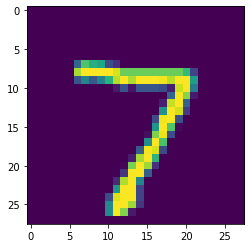

In [19]:
# first data point in X_tesabst

plt.imshow(X_test_resize[0])
plt.show()

In [20]:
print(y_test[0])

7


In [21]:
y_pred = model.predict(X_test_resize)

In [22]:
print(y_pred.shape)

(10000, 10)


In [23]:
print(y_pred[0])

[3.6758234e-08 9.1079683e-06 5.8406431e-07 6.1094465e-07 1.0358707e-08
 2.2238256e-08 2.5549757e-10 9.9998713e-01 1.4643135e-07 2.3249349e-06]


- model.predict() gives the prediction probability fo each class for that data point

In [24]:
# Converting the prediction probabilities to class label

print(np.argmax(y_pred[0]))

7


In [25]:
# Converting the prediction probabilities to class label for all test data points

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 1, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 8, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

- y_test = True labels
- y_pred_labels = Predicted labels

In [26]:
# Confusion Matrix

from tensorflow.math import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred_labels)
conf_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    2,    0,    2,    0,    1,    2,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1007,    6,    4,    0,    0,   11,    1,    0],
       [   0,    0,    2, 1003,    0,    4,    0,    0,    1,    0],
       [   0,    0,    0,    0,  976,    0,    3,    0,    2,    1],
       [   2,    0,    0,    4,    0,  877,    8,    1,    0,    0],
       [   1,    2,    0,    0,    2,    1,  951,    0,    1,    0],
       [   1,    5,    3,    2,    1,    1,    0, 1009,    3,    3],
       [   0,    0,    1,    1,    2,    0,    1,    1,  965,    3],
       [   5,    0,    0,    0,    8,    4,    1,    2,    3,  986]])>

Text(0.5, 51.0, 'Predicted Labels')

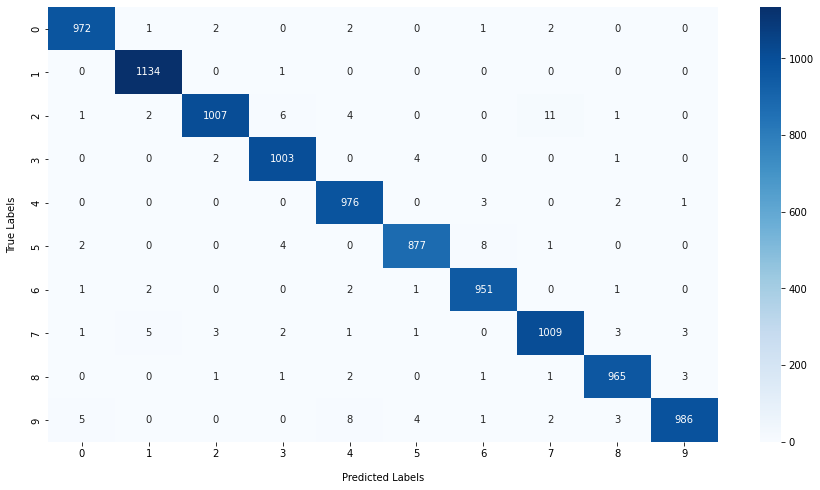

In [27]:
# Show heatmap of confusion matrix

plt.figure(figsize= (15,8))
sns.heatmap(conf_mat, annot= True, fmt = 'd', cmap= 'Blues')
plt.ylabel('True Labels',labelpad= 14)
plt.xlabel('Predicted Labels', labelpad= 14)

**Building a Predictive System**

In [28]:
input_image_path = 'C:\\Users\\HP\\Desktop\\nilesh\\krish practice dataset\\eight.png'

In [29]:
import cv2

In [30]:
input_image = cv2.imread(input_image_path)

In [31]:
type(input_image)

numpy.ndarray

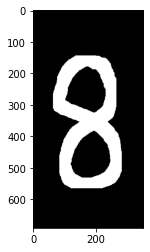

In [32]:
plt.imshow(input_image)

In [33]:
input_image.shape

(691, 350, 3)

In [34]:
# Convert the RGB image to Grayscale image

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [35]:
grayscale_image.shape

(691, 350)

In [36]:
input_image_resize = cv2.resize(grayscale_image, (28,28))

In [37]:
input_image_resize.shape

(28, 28)

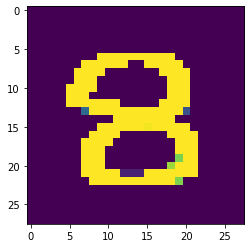

In [38]:
plt.imshow(input_image_resize)

In [39]:
# Scale the image

input_image_resize = input_image_resize / 255

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28,1])  #[n no.img, img_size, img_size, channel]

In [41]:
input_prediction = model.predict(image_reshaped)
input_prediction

array([[4.0793574e-18, 6.2014431e-25, 1.5274458e-12, 2.0572172e-10,
        2.1094744e-19, 1.2588565e-11, 2.2378975e-14, 1.5508831e-21,
        1.0000000e+00, 8.3010777e-17]], dtype=float32)

In [42]:
# Converting the prediction probabilities to class label

print(np.argmax(input_prediction))

8


**One more Prediction**

In [43]:
input_image_path = 'C:\\Users\\HP\\Desktop\\nilesh\\krish practice dataset\\six.png'

In [44]:
input_image = cv2.imread(input_image_path)

In [45]:
input_image.shape

(577, 350, 3)

In [46]:
type(input_image)

numpy.ndarray

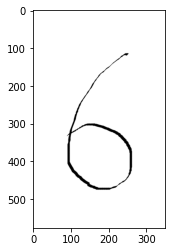

In [47]:
plt.imshow(input_image)

In [48]:
# Convert the RGB image to Grayscale image

grayscale_image = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [49]:
grayscale_image.shape

(577, 350)

In [50]:
input_image_resize = cv2.resize(grayscale_image, (28,28))

In [51]:
input_image_resize.shape

(28, 28)

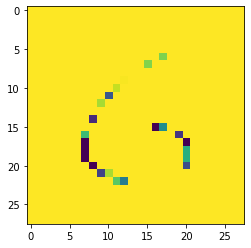

In [52]:
plt.imshow(input_image_resize)

In [53]:
# Scale the image

input_image_resize = input_image_resize / 255

In [54]:
image_reshaped = np.reshape(input_image_resize, [1,28,28,1])  #[n no.img, img_size, img_size, channel]

In [55]:
input_prediction = model.predict(image_reshaped)
input_prediction

array([[1.4739340e-02, 3.0219310e-04, 3.1054828e-02, 2.6070245e-03,
        1.8128002e-02, 1.9857144e-02, 5.0114888e-01, 2.7257556e-04,
        4.1062236e-01, 1.2676067e-03]], dtype=float32)

In [56]:
# Converting the prediction probabilities to class label

print(np.argmax(input_prediction))

6
